# DDF test for point vortex in potential flow

In [1]:
using Pkg
Pkg.activate("/Users/beckers/Google Drive/Academic/UCLA/CodingInProgress/ViscousFlow.jl");
using ViscousFlow
using Plots
using LinearAlgebra
using DifferentialEquations
# pyplot()
clibrary(:colorbrewer)
default(grid = false)

In [2]:
mutable struct Vortex
    x::Real
    y::Real
    Γ::Real
end

In [3]:
function advect!(p::Vortex, u::Real, v::Real , Δt::Float64) where T
#     print("current position: $(p.x)\n")
#     print("velocity: $(v)\n")
#     print("updated position: $(p.x .+ v.*Δt)\n")
    p.x += u*Δt
    p.y += v*Δt
end

advect! (generic function with 1 method)

In [4]:
function biot_savart(r,Γ)
    v = Γ/(2*π*r)
end

biot_savart (generic function with 1 method)

### Eulerian grid

In [5]:
nx = 32; ny = 32;
Lx = 2.0;
dx = Lx/(nx-2);
display(dx)
w = Nodes(Dual,(nx,ny));
w .= 0.0
q = Edges(Primal,(nx,ny));
ψ = Nodes(Dual,w);
L = plan_laplacian(size(w),with_inverse=true)

0.06666666666666667

Discrete Laplacian (and inverse) on a (nx = 32, ny = 32) grid with spacing 1.0

### Problem parameters

In [6]:
# Add point vortex
vortex_1 = Vortex(1.01,1.01,1.0)

vortices = Array{Vortex,1}()
push!(vortices,vortex_1)

tloc = 0.0

0.0

In [15]:
function rhs(u,p,t)
    Γ = ScalarData(p)
    L⁻¹(w::T) where {T} = L\w;
    
    # Regularize vorticity to grid
    Hw = Regularize(VectorData(u[:,1],u[:,2]),dx;ddftype=Fields.M4prime,issymmetric=true)
    Hw(w,Γ)
    
    # Solve for streamfunction
    ψ .= -(L\(w)); 
    
    # Calculate velocity field
    q = curl(ψ);
    
        # Interpolate velocity to point vortex
#     vel = VectorData(Γ)
#     Hw(vel,q) # has a u and v component
#     du = [vel.u vel.v]
    
    # EDIT: interpolate to nodes before interpolating
    wx = Nodes(Dual,(nx,ny)); wy = deepcopy(wx);
    Fields.interpolate!((wx,wy),q);
    
    vel_x = ScalarData(Γ)
    vel_y = ScalarData(Γ)
    Hw(vel_x,wx)
    Hw(vel_y,wy)
    du = [vel_x vel_y]
end 

rhs (generic function with 1 method)

### Time marching

In [16]:
tspan = (0.0,100.0);#0.25
vortices_loc = VectorData([vortex.x for vortex in vortices],[vortex.y for vortex in vortices])
vortices_Γ = ScalarData([vortex.Γ for vortex in vortices])
u0 = [vortices_loc.u vortices_loc.v]
p = vortices_Γ[:]
prob = ODEProblem(rhs,u0,tspan,p)

ODEProblem with uType Array{Float64,2} and tType Float64. In-place: false
timespan: (0.0, 100.0)
u0: [1.01 1.01]

In [17]:
sol = solve(prob,dt=1.0,RK4(),dense=true)

retcode: Success
Interpolation: 3rd order Hermite
t: 4-element Array{Float64,1}:
   0.0
   1.0
  11.0
 100.0
u: 4-element Array{Array{Float64,2},1}:
 [1.01 1.01]
 [1.01 1.01]
 [1.01 1.01]
 [1.01 1.01]

In [18]:
sum(w)

0.9999999999999997

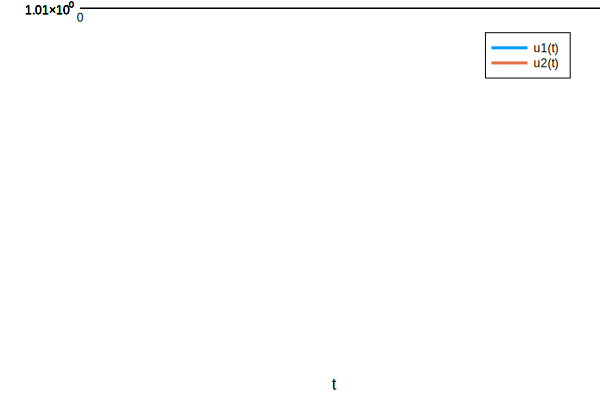

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW


In [19]:
plot(sol)

### Plot results

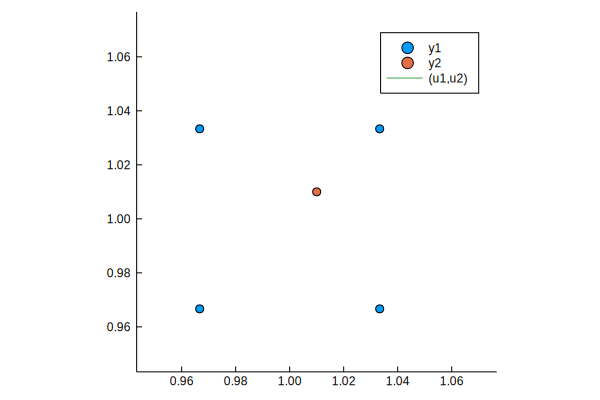

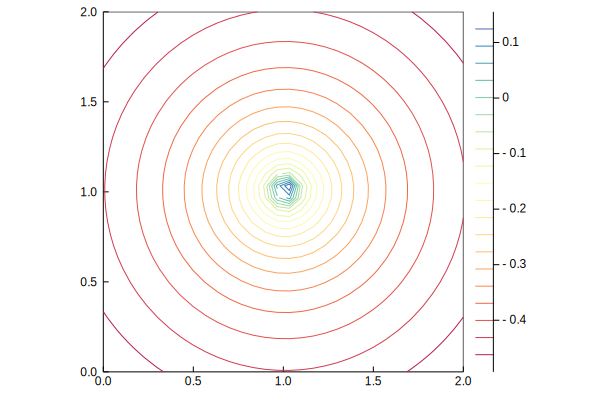

In [20]:
xg,yg = coordinates(ψ,dx=dx)
coord = [(x,y) for x in xg, y in yg]

p1 = scatter(first.(coord)[:],last.(coord)[:],ratio=:equal)
scatter!([sol[end][1]],[sol[end][2]])
quiver!()
plot!(sol,vars=(1,2),lw=1)
xlims!(minimum(sol[1,:])-1*dx,maximum(sol[1,:])+1*dx)
ylims!(minimum(sol[2,:])-1*dx,maximum(sol[2,:])+1*dx)
savefig("one_vortex_$(vortex_1.x)_$(vortex_1.y)_m4prime_trajectory.pdf")

p4 = plot(sol,vars=[(1,2)],lw=2,color=:black)
plot!(xg,yg,ψ,levels=20);
plot!(xlims=(0,Lx),ylims=(0,Lx))
savefig("one_vortex_$(vortex_1.x)_$(vortex_1.y)_m4prime_streamfunction.pdf")

display(p1)
display(p4)


### Biot-Savart analysis

Calculate vorticity at the four grid points near the point vortex

In [14]:
ddf_1 = DDF(ddftype=Fields.Withchat)
ddf_1 = DDF(ddftype=Fields.M3)
ddf_2 = DDF(ddftype=Fields.M4prime)
ddf_3 = DDF(ddftype=Fields.Yang3)
ddf_4 = DDF(ddftype=Fields.Goza)
u = -3.0:0.1:3.0
plot(u,ddf_1.(u),label="Withchat")
plot(u,ddf_1.(u),label="M3")
plot!(u,ddf_2.(u),label="M4'")
plot!(u,ddf_3.(u),label="Yang3")
plot!(u,ddf_4.(u),label="Goza")

UndefVarError: UndefVarError: Withchat not defined

In [15]:
minimum(trajectories_x)

UndefVarError: UndefVarError: trajectories_x not defined

In [110]:
?min

search: min minmax minimum minimum! argmin eigmin Main typemin findmin findmin!



```
min(x, y, ...)
```

Return the minimum of the arguments. See also the [`minimum`](@ref) function to take the minimum element from a collection.

# Examples

```jldoctest
julia> min(2, 5, 1)
1
```


In [37]:
xg,yg = coordinates(ψ,dx=dx)
coord = [(x,y) for x in xg, y in yg]
quiver(first.(coord)[:],last.(coord)[:],quiver=(u, v))

75-element Array{Float64,1}:
 0.5                
 0.5                
 0.5                
 0.5000000000000195 
 0.5000000810069436 
 0.500050398897037  
 0.5016646478694089 
 0.5063242267824969 
 0.5073185122140125 
 0.5068224636083404 
 0.5033875326551314 
 0.5008872028731673 
 0.49980671927776993
 ⋮                  
 0.4975683920242785 
 0.5004464128768297 
 0.5034604497373832 
 0.5060029274709494 
 0.5054373431206886 
 0.5017095285023656 
 0.4984465379559387 
 0.4951253026989099 
 0.4940757777599868 
 0.4965740997374482 
 0.4998589480227682 
 0.5025409136665037 

In [149]:
q = curl(ψ)

Edges{Primal,32,32} data
u (in grid orientation)
31×32 Array{Float64,2}:
 -0.00508841  -0.00544247  -0.00582075  …  -0.00552472  -0.00516524
 -0.00505848  -0.0054353   -0.00584171     -0.00552331  -0.00513995
 -0.00499989  -0.00539854  -0.00583283     -0.00549219  -0.00508574
 -0.00490758  -0.00532612  -0.00578698     -0.00542504  -0.00499733
 -0.00477614  -0.00521138  -0.00569604     -0.00531491  -0.00486906
 -0.00460003  -0.00504723  -0.00555106  …  -0.00515429  -0.00469506
 -0.00437385  -0.00482644  -0.00534253     -0.00493552  -0.00446957
 -0.00409273  -0.00454217  -0.00506095     -0.0046512   -0.00418732
 -0.00375285  -0.00418854  -0.00469761     -0.00429494  -0.0038441 
 -0.00335206  -0.00376155  -0.00424567     -0.00386218  -0.00343742
 -0.00289048  -0.00325992  -0.00370154  …  -0.00335124  -0.00296716
 -0.00237115  -0.00268612  -0.00306635     -0.00276437  -0.00243627
 -0.00180041  -0.00204705  -0.00234725     -0.00210858  -0.00185124
  ⋮                                     ⋱  

In [13]:
[vortices_loc.u vortices_loc.v]

2×2 Array{Float64,2}:
 1.0  0.5
 1.0  1.5

In [14]:
a[2:2:end]

2-element Array{Int64,1}:
 4
 8

In [40]:
function print_w()
    display(w)
end

print_w (generic function with 1 method)

In [42]:
print_w()

Nodes{Dual,128,128} data
Printing in grid orientation (lower left is (1,1))
128×128 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [42]:
minimum(sol.u[1,:])

2×2 Array{Float64,2}:
 1.0  0.5
 1.0  1.5

In [43]:
sol.u[1,:]

1-element Array{Array{Float64,2},1}:
 [1.0 0.5; 1.0 1.5]

In [65]:
sol[end][2]

0.5009999749820055

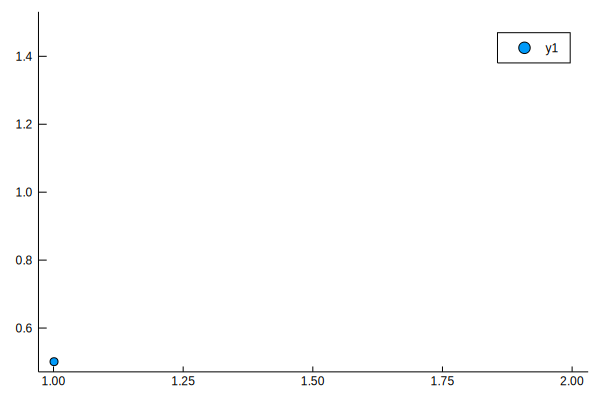

In [68]:
scatter([sol[end][1]],[sol[end][2]])

In [146]:
sol

retcode: Success
Interpolation: 3rd order Hermite
t: 2-element Array{Float64,1}:
 0.0
 0.1
u: 2-element Array{Array{Float64,2},1}:
 [1.02587 1.01]   
 [1.02335 1.01252]

In [149]:
?DiffEqBase.solve

No documentation found.

`DiffEqBase.solve` is a `Function`.

```
# 9 methods for generic function "solve":
[1] solve(prob::EnsembleProblem, args...; kwargs...) in DiffEqBase at /Users/beckers/.julia/packages/DiffEqBase/LCorD/src/solve.jl:46
[2] solve(prob::DiffEqBase.AbstractODEProblem{uType,tType,isinplace}, Alg::DiffEqBase.InternalEuler.FwdEulerAlg; dt, tstops, kwargs...) where {uType, tType, isinplace} in DiffEqBase.InternalEuler at /Users/beckers/.julia/packages/DiffEqBase/LCorD/src/internal_euler.jl:21
[3] solve(prob::DiffEqBase.AbstractODEProblem{uType,tType,isinplace}, Alg::DiffEqBase.InternalEuler.BwdEulerAlg; dt, tstops, tol, maxiter, kwargs...) where {uType, tType, isinplace} in DiffEqBase.InternalEuler at /Users/beckers/.julia/packages/DiffEqBase/LCorD/src/internal_euler.jl:57
[4] solve(prob::DiffEqBase.AbstractNoiseProblem, ::Nothing, args...; dt, kwargs...) in DiffEqNoiseProcess at /Users/beckers/.julia/packages/DiffEqNoiseProcess/SCC7m/src/solve.jl:1
[5] solve(prob::DiffEqBase.AbstractNoiseProblem, args...; dt, kwargs...) in DiffEqNoiseProcess at /Users/beckers/.julia/packages/DiffEqNoiseProcess/SCC7m/src/solve.jl:4
[6] solve(jump_prob::JumpProblem, alg::SSAStepper; kwargs...) in DiffEqJump at /Users/beckers/.julia/packages/DiffEqJump/UMzkq/src/SSA_stepper.jl:27
[7] solve(jump_prob::JumpProblem, alg::SimpleTauLeaping; seed, dt) in DiffEqJump at /Users/beckers/.julia/packages/DiffEqJump/UMzkq/src/simple_regular_solve.jl:8
[8] solve(jump_prob::JumpProblem, alg::RegularSSA) in DiffEqJump at /Users/beckers/.julia/packages/DiffEqJump/UMzkq/src/simple_regular_solve.jl:54
[9] solve(prob::DiffEqBase.DEProblem, args...; kwargs...) in DiffEqBase at /Users/beckers/.julia/packages/DiffEqBase/LCorD/src/solve.jl:27
```


In [234]:
ddf_radius

Elliptical body with 20 points and semi-axes (0.2857142857142857,0.2857142857142857)
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [274]:
ViscousFlow.vectorlist

UndefVarError: UndefVarError: vectorlist not defined